In [1]:
%matplotlib widget
from solver import *

from models import NPN, PNP, Diode, Resistor, VoltageSource, CurrentSource, OpAmp, Capacitor, Inductor
import sympy as sp
sp.init_printing()

In [2]:
Vcc = 5

var = sp.Symbol("Vin", real=True)

In [3]:
acTest = Solver.Circuit("acTest")
acTest.element(
                    #VoltageSource("Vg", {"V+" : "V2", "V-" : Gnd}, V_s = 20 / (s**2 + 20)),
                    VoltageSource("Vg", {"V+" : "V1", "V-" : Gnd}, V_s = 20 / (s**2 + 20)),
                    Diode("D1", {"Vp" : "V1", "Vn" : "V2"}),
                    Resistor("R1", {"V1" : "V2", "V2" : "Vc"}, R = 1e3),
                    Resistor("R2", {"V1" : "Vc", "V2" : Gnd}, R = 1e3),
                    #Capacitor("C1", {"V1" : "Vc", "V2" : Gnd}, V0 = 0),
)

{'Vg': {'name': 'Vg', 'type': 'VoltageSource', 'nodes': {'V+': 'V1', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_s': 20/(s**2 + 20)}},
 'D1': {'name': 'D1', 'type': 'Diode', 'nodes': {'Vp': 'V1', 'Vn': 'V2'}, 'values': {'Vd': 0.6, 'T': 300}},
 'R1': {'name': 'R1', 'type': 'Resistor', 'nodes': {'V1': 'V2', 'V2': 'Vc'}, 'values': {'R': 1000.0}},
 'R2': {'name': 'R2', 'type': 'Resistor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'R': 1000.0}}}

In [4]:
multivibrator = Solver.Circuit("multivibrator")
multivibrator.element(
    Resistor("R", {"V1" : "Vc", "V2" : "Vout"}, R = 50e3),
    OpAmp("Op1", {"V+" : "V+", "V-" : "Vc", "Vop" : "Vout", "Vcc" : Vcc, "Vee" : -Vcc}),
    Resistor("R1", {"V1" : "Vout", "V2" : "V+"}, R = 35e3),
    Resistor("R2", {"V1" : "V+", "V2" : Gnd}, R = 30e3),
    Capacitor("C1", {"V1" : "Vc", "V2" : Gnd}, C = 10e-9, V0 = 1e-1),
)

{'R': {'name': 'R', 'type': 'Resistor', 'nodes': {'V1': 'Vc', 'V2': 'Vout'}, 'values': {'R': 50000.0}},
 'Op1': {'name': 'Op1', 'type': 'OpAmp', 'nodes': {'V+': 'V+', 'V-': 'Vc', 'Vop': 'Vout', 'Vcc': 5, 'Vee': -5}, 'values': {'Av': oo}},
 'R1': {'name': 'R1', 'type': 'Resistor', 'nodes': {'V1': 'Vout', 'V2': 'V+'}, 'values': {'R': 35000.0}},
 'R2': {'name': 'R2', 'type': 'Resistor', 'nodes': {'V1': 'V+', 'V2': 0}, 'values': {'R': 30000.0}},
 'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'C': 1e-08, 'V0': 0.1}}}

In [5]:
opTest = Solver.Circuit("opTest")
opTest.element(
    
    Resistor("Rc", {"V1" : Vcc, "V2" : "Vc"}, R = 1e3),
    
    Capacitor("Cout", {"V1" : "Vc", "V2" : "Vout"}),
    Resistor("Rout", {"V1" : "Vout", "V2" : Gnd}, R = 1e3),
    
    NPN("Q1", {"Vc" : "Vc", "Vb" : "Vb", "Ve" : Gnd}),
    
    VoltageSource("Vbb", {"V+" : "Vbb", "V-" : Gnd}, Vdc = 1.6),
    Resistor("Rb", {"V1" : "Vbb", "V2" : "Vb"}, R = 31.2e3),
    
    Capacitor("Cin", {"V1" : "Vg", "V2" : "Vb"}),
    Resistor("Rg", {"V1" : "Vin", "V2" : "Vg"}, R = 1e3),
    VoltageSource("Vg", {"V+" : "Vin", "V-" : Gnd}, Vac = var),
)

{'Rc': {'name': 'Rc', 'type': 'Resistor', 'nodes': {'V1': 5, 'V2': 'Vc'}, 'values': {'R': 1000.0}},
 'Cout': {'name': 'Cout', 'type': 'Capacitor', 'nodes': {'V1': 'Vc', 'V2': 'Vout'}, 'values': {'C': 1e-06, 'V0': 0}},
 'Rout': {'name': 'Rout', 'type': 'Resistor', 'nodes': {'V1': 'Vout', 'V2': 0}, 'values': {'R': 1000.0}},
 'Q1': {'name': 'Q1', 'type': 'NPN', 'nodes': {'Vc': 'Vc', 'Vb': 'Vb', 'Ve': 0}, 'values': {'Vdf': 0.6, 'Vdr': 0.4, 'Bf': 100, 'Br': 0.1}},
 'Vbb': {'name': 'Vbb', 'type': 'VoltageSource', 'nodes': {'V+': 'Vbb', 'V-': 0}, 'values': {'Vdc': 1.6, 'Vac': 0, 'V_s': 0}},
 'Rb': {'name': 'Rb', 'type': 'Resistor', 'nodes': {'V1': 'Vbb', 'V2': 'Vb'}, 'values': {'R': 31200.0}},
 'Cin': {'name': 'Cin', 'type': 'Capacitor', 'nodes': {'V1': 'Vg', 'V2': 'Vb'}, 'values': {'C': 1e-06, 'V0': 0}},
 'Rg': {'name': 'Rg', 'type': 'Resistor', 'nodes': {'V1': 'Vin', 'V2': 'Vg'}, 'values': {'R': 1000.0}},
 'Vg': {'name': 'Vg', 'type': 'VoltageSource', 'nodes': {'V+': 'Vin', 'V-': 0}, 'value

In [6]:
smallSignalTest = Solver.Circuit("smallSignalTest")
smallSignalTest.element(
    VoltageSource("Vg", {"V+" : "Vin", "V-" : Gnd}, Vdc = 3, Vac = var),
    Resistor("Rg", {"V1" : "Vin", "V2" : "Vd"}, R = 1e3),
    Diode("D1", {"Vp" : "Vd", "Vn" : Gnd}),
)

{'Vg': {'name': 'Vg', 'type': 'VoltageSource', 'nodes': {'V+': 'Vin', 'V-': 0}, 'values': {'Vdc': 3, 'Vac': Vin, 'V_s': 0}},
 'Rg': {'name': 'Rg', 'type': 'Resistor', 'nodes': {'V1': 'Vin', 'V2': 'Vd'}, 'values': {'R': 1000.0}},
 'D1': {'name': 'D1', 'type': 'Diode', 'nodes': {'Vp': 'Vd', 'Vn': 0}, 'values': {'Vd': 0.6, 'T': 300}}}

In [7]:
Solver.setMain("acTest")
compiled = Solver.compile()

In [8]:
model = Solver.solveLaplace(compiled, 10, debugLog = True)

{('R1', ''), ('D1', 'Cut'), ('R2', ''), ('Vg', '')}
[Eq(V0, 20/(s**2 + 20)), Eq(I0_0 + I0_1, 0), Eq(I1_0, 0), Eq(I1_1, 0), Eq(I2_0, 0.001*V1 - 0.001*V2), Eq(I2_0 + I2_1, 0), Eq(I3_0, 0.001*V2), Eq(I3_0 + I3_1, 0), Eq(I0_0 + I1_0, 0), Eq(I1_1 + I2_0, 0), Eq(I2_1 + I3_0, 0)]
[V0 - V1 < 0.6]
-------------------------------------------------
V0 20.0/(s**2 + 20.0)
1.0/(0.05*s**2 + 1.0) 0 0
V0 4.47213595499958*sin(4.47213595499958*t)
V0 0
-----------------
I0_0 0.0
0.0
I0_0 0
I0_0 0
-----------------
I0_1 0.0
0.0
I0_1 0
I0_1 0
-----------------
I1_0 0.0
0.0
I1_0 0
I1_0 0
-----------------
I1_1 0.0
0.0
I1_1 0
I1_1 0
-----------------
I2_0 0.0
0.0
I2_0 0
I2_0 0
-----------------
I2_1 0.0
0.0
I2_1 0
I2_1 0
-----------------
I3_0 0.0
0.0
I3_0 0
I3_0 0
-----------------
I3_1 0.0
0.0
I3_1 0
I3_1 0
-----------------
V1 0.0
0.0
V1 0
V1 0
-----------------
V2 0.0
0.0
V2 0
V2 0
-----------------
-------------------------------------------------
[V0 - V1 < 0.6]
[True]
**********************************

IndexError: list index out of range

In [ ]:
print(compiled["nodes"])
#Vin = var
Vin = compiled["voltages"]["Vg"]["V+"]
#Id = compiled["currents"]["D1"]["Vp"]
#Vd = compiled["voltages"]["D1"]["Vp"] - compiled["voltages"]["D1"]["Vn"]
Vc = compiled["nodes"]["Vc"]

{'V1': V0, 'Vc': V1, 'V2': V2}


In [ ]:
printModel(model, var=t, important={Vin, Vc})

{('R2', ''), ('R1', ''), ('Vg', ''), ('D1', 'Cut')}
t ∈ Interval.Ropen(0, 0.600000000000000)
{V1: 0, V0: t}
{V1: 0, V0: 0}
{V1: 0, V0: 0.600000000000000}
-------------------------------------
{('R2', ''), ('D1', 'Fwd'), ('R1', ''), ('Vg', '')}
t ∈ Interval(0.600000000000000, 10.0099999999998)
{V1: 0.5*t - 0.3, V0: t}
{V1: 0, V0: 0.600000000000000}
{V1: 4.70499999999992, V0: 10.0099999999998}
-------------------------------------


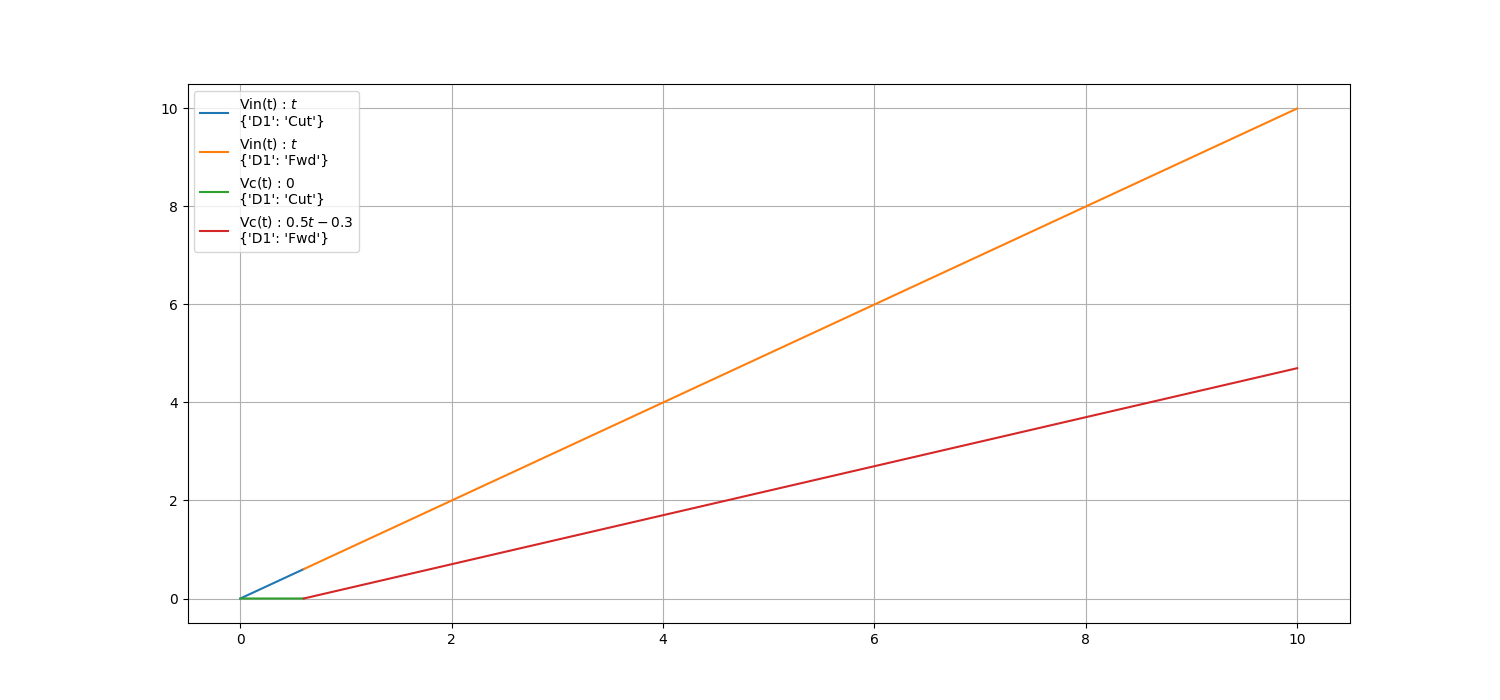

In [ ]:
measurments =   [   
                    (Vin, "Vin(t)"),
                    #(Id, "Id(t)"),
                    #(Vd, "Vd(t)"),
                    (Vc, "Vc(t)"),
                    #(lambda sol : Uc.subs(sol), "Uc"),
                ]

fig, ax = plt.subplots(figsize=[15, 7])

plotTranMeasurments(model, 0, 10, 1e-5, measurments)
plt.legend(loc="best");
plt.grid(True);
plt.show()